# Fashion MNIST 
Machine Learning and Neural Networks make complex problems like Computer Vision easy to solve.

Fashion MNIST is a dataset containg photos of different items of clothing like shoes, shits, pants etc.
A picture is first converted to a size of 28 by 28 pixels. This image is then converted into greyscale. We do this as this reduces a lot of data that is to be feed into the neural network.

We will be training a neural network to successfully classify these objects.

## Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

To load the Fashion MNIST data we will be using a TensorFlow function call.

The second line splits the dataset into two parts
- The training dataset
- The test dataset


The MNIST dataset contains a total of 70,000 images. the dataset is split in such a manner that 60,000 images are in the training set and the rest 10,000 images are in the test set

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Visualizing data is always considered a good practice in Machine Learning. To visualize this data we run the code below.

Matplotlib is a library in python which helps in visulaising data. The numbers are the values of the pixels which range from 0 to 255. 0 being White and 255 being Black

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

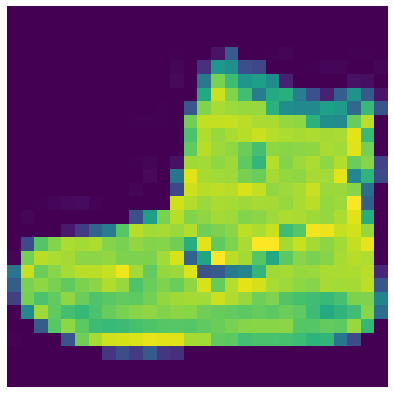

In [12]:
import numpy as np
np.set_printoptions(linewidth=200) # sets the linewidth
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7)) # changes the figures size
plt.axis('off') #hides axis
plt.imshow(X_train[0]) #change 0 to any number to view the image at that index
print(X_train[0]) #change 0 to any number to view the data at that index

A neural network or a Machine Learning model in general works better if the data is normalized. We divide the values of the pixels by 255 to get the range between 0 and 1.

In [14]:
X_train  = X_train / 255
X_test = X_test / 255

Now adding the neural network

The neural layer will consist of three layers
1. Input layer
2. Hidden layer
3. Output layer

The method **Sequential** defines the sequence of the layers

The Input layer in your network should be the same shape as your data.
The input layer will expect an input of a 28 by 28 matrix _(defined by the  input_shape attribute)_ as the images are of this size. The **Flatten** method then converts this matrix into a simple linear array avoiding the use of 28 layers of 28 neurons which would be infeasible.

The hidden layer consists of **128** neurons in which the classification takes place. The **Dense** method is used to add a layer in network the first attribute assigns the number of neuron present in a layer. The activation type of this layer is **Relu**. 

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

The output layer will contain **10** neurons (set by the Dense method) each depicting the 10 classes in the dataset. The number of neurons in the output layer should always be equal to the number of classes in the problem. _(Except when there are only two classes then the result will be 0 or 1 depicting the first class and second class respectively.)_ The activation function of this layer is **Softmax**. 

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like, 

[0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]

it saves you from fishing through it looking for the biggest value, and turns it into.

[0,0,0,0,1,0,0,0,0]

The index of 1 is the class identified by the network.

In [15]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu), #change 128 to increase the number of neurons in the hidden layer
                          keras.layers.Dense(10,activation=tf.nn.softmax)
                          ])

Changing the number of neurons in the hidden layer will affect the time taken to run and the accuracy of the network.
- A higher number will give you a better accuracy but will consume more time

There isn't a significant impact effects of additional layers (hidden layer 2, 3 etc.)in the network because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

Now to set the optimizer and loss function of the neural network we use the following code. This is done by the **compile** method. The metrics attribute gives us an idea of how good our prediction is.

After this the data is fit in the network using the **fit** method. The first attribute are the features of the data, the scond attribute are the labels of the data. Epochs is the number of time this model runs optimizing itself with the help of the optimizer and loss functions.

In [17]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4994 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3766 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3389 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3129 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8911


Now after fitting this data we test it on data which it hasn't seen ie the data which is not in the training set. We use the **evaluate** method for this.

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8789


[0.3417207896709442, 0.8788999915122986]